In [1]:
# Importando Bibliotecas
import numpy as np
import pandas as pd
# Definindo a precisão dos dados no projeto(3)
pd.set_option("display.precision", 3)

In [2]:
# Importando os Dados a Serem Trabalhados
policia = pd.read_csv('police.csv')
weather = pd.read_csv('weather.csv')

## 1. Preparação dos dados para a análise.

_Antes de iniciar sua análise, é fundamental que você primeiro examine e limpe o conjunto de
dados, para tornar o trabalho com ele um processo mais eficiente. Nesta parte, você praticará a
correção de tipos de dados, manipulação de valores ausentes e eliminação de colunas e linhas
enquanto aprende sobre o conjunto de dados do Stanford Open Policing Project._

----

In [3]:
# Informações
policia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

In [4]:
# Faltosos
policia.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [5]:
# Droppando Coluna State e Criando Uma Variável Para Não Alterar os Dados Originais
Policia = policia.drop(['state','county_name'],axis = 1)

In [6]:
# Verificando Se O Procedimento Foi Realizado Corretamente
Policia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           91741 non-null  object
 1   stop_time           91741 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86539 non-null  object
 4   violation_raw       86539 non-null  object
 5   violation           86539 non-null  object
 6   search_conducted    91741 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86539 non-null  object
 9   is_arrested         86539 non-null  object
 10  stop_duration       86539 non-null  object
 11  drugs_related_stop  91741 non-null  bool  
 12  district            91741 non-null  object
dtypes: bool(2), object(11)
memory usage: 7.9+ MB


In [7]:
#Droppando os Valores Faltosos da Coluna "Driver Gender"
Policia.dropna(subset=['driver_gender'], inplace = True) 

In [8]:
# Verificando Se O Procedimento Foi Realizado Corretamente
Policia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  object
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(2), object(11)
memory usage: 8.1+ MB


In [9]:
# Mudando o Tipo de Dados para Objeto
Policia['search_conducted'] = Policia['search_conducted'].astype(object)

In [10]:
# Verificando Se O Procedimento Foi Realizado Corretamente
Policia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  object
 7   search_type         3307 non-null   object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  object
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(1), object(12)
memory usage: 8.7+ MB


In [11]:
# Criando uma Coluna que Receba Ambas as Informações de Data e Horário
Policia['stop_datetime'] = Policia[['stop_date','stop_time']].agg('  '.join, axis=1)

In [12]:
# Convertendo Para Datetime
Policia['stop_datetime'] = pd.to_datetime(Policia['stop_datetime'])

In [13]:
# Removendo as Colunas Não Mais Necessárias
Policia.drop(['stop_date','stop_time'],axis = 1, inplace = True)

In [14]:
# Tornando a Coluna Datetime em Index
Policia.set_index('stop_datetime')

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
2015-12-31 21:59:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2015-12-31 22:04:00,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3


## 2. Análise do gênero sobre as infrações.

_O gênero do motorista influencia o comportamento da polícia durante uma parada no trânsito?
Nesta parte, você explorará essa questão enquanto pratica filtragem, agrupamento e muito
mais!_

----

In [15]:
# Verificando os Tipos de Infrações
Policia['violation'].unique()

array(['Equipment', 'Speeding', 'Other', 'Moving violation',
       'Registration/plates', 'Seat belt'], dtype=object)

In [16]:
# Contando Quantas Vezes Cada Infração Ocorreu
Policia['violation'].value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [17]:
# Criando Uma Tabela de Frequências Para As Infrações
a = Policia['violation'].value_counts().sum()
data = {'CAUSA' : ['Speeding', 'Moving violation', 'Equipment', 'Registration/plates', 'Seat belt', 'Other', 'Total'], 
        'FREQUÊNCIA ABS.': [48423, 16224, 10921, 3703, 2856, 4409 , a], 
       'FREQUÊNCIA REL.' : [48423/a, 16224/a, 10921/a, 3703/a, 2856/a, 4409/a, a/a]}

tf = pd.DataFrame(data)
tf.set_index('CAUSA')

,FREQUÊNCIA ABS.,FREQUÊNCIA REL.
CAUSA,,
Speeding,48423,0.560
Moving violation,16224,0.187
Equipment,10921,0.126
Registration/plates,3703,0.043
Seat belt,2856,0.033
Other,4409,0.051
Total,86536,1.000


__A ocorrência mais comum foi Speeding(Excesso de Velocidade), já a menos comum foi Seat Belt(Auxência de Sinto de Segurança).__

---

In [18]:
# Contando Quantas Vezes Cada Infração Ocorreu Para Cada Sexo
print(Policia['driver_gender'].value_counts())
Policia[['driver_gender','violation']].value_counts()

M    62762
F    23774
Name: driver_gender, dtype: int64


driver_gender  violation          
M              Speeding               32777
F              Speeding               15646
M              Moving violation       12938
               Equipment               8420
               Other                   3702
F              Moving violation        3286
M              Registration/plates     2647
F              Equipment               2501
M              Seat belt               2278
F              Registration/plates     1056
               Other                    707
               Seat belt                578
dtype: int64

In [19]:
# Criando Uma Tabela de Contingência Absoluta Para As Infrações Separadas Por Sexo
data = {'CAUSA' : ['Speeding', 'Moving violation', 'Equipment', 'Registration/plates', 'Seat belt', 'Other', 'Total'], 
        "MASCULINO" : [ 32777, 12938,8420,2647,2278,3702,62762],
        "FEMININO" : [15646, 3286, 2501, 1056, 578, 707,23774]}
tfabs = pd.DataFrame(data)

In [20]:
tfabs.set_index('CAUSA')

,MASCULINO,FEMININO
CAUSA,,
Speeding,32777,15646
Moving violation,12938,3286
Equipment,8420,2501
Registration/plates,2647,1056
Seat belt,2278,578
Other,3702,707
Total,62762,23774


In [21]:
# Criando Uma Tabela de Contingência Relativa Para As Infrações Separadas Por Sexo
data2rel = {'CAUSA' : ['Speeding', 'Moving violation', 'Equipment', 'Registration/plates', 'Seat belt', 'Other', 'Total'], 
            'MASCULINO' : [ 32777/62762, 12938/62762,8420/62762,2647/62762,2278/62762,3702/62762,62762/62762], 
            'FEMININO' : [15646/23774, 3286/23774, 2501/23774, 1056/23774, 578/23774, 707/23774,23774/23774]}

In [22]:
tfrel = pd.DataFrame(data2rel)
tfrel.set_index('CAUSA')

,MASCULINO,FEMININO
CAUSA,,
Speeding,0.522,0.658
Moving violation,0.206,0.138
Equipment,0.134,0.105
Registration/plates,0.042,0.044
Seat belt,0.036,0.024
Other,0.059,0.030
Total,1.000,1.000


__Não expressivamente, podemos ver que baseado no Data Frame temos que mulheres cometem a infração Speeding mais que homens, porém homens cometem mais a infração Moving Violation, no entanto todas as outras infrações são cometidas na mesma proporção.__

---

<AxesSubplot:title={'center':'Gráfico de Barras Para a Variável "Violation" Considerando o Sexo do Violador'}, xlabel='Causas: 6 - Total / 5 - Other / 4 - Seat Belt / 3 - Registrantion/Plates / 2 - Equipment / 1 - Moving Violation / 0 - Speeding ', ylabel='Número de Ocorrências'>

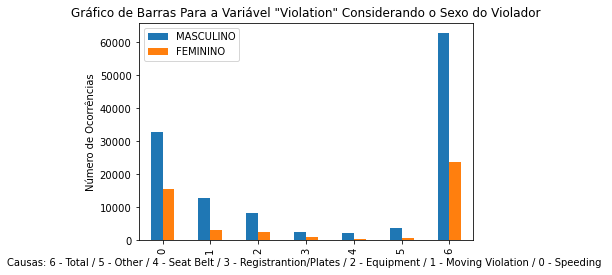

In [23]:
# Construindo um Gráfico de Barras
tfabs.plot.bar(title = 'Gráfico de Barras Para a Variável "Violation" Considerando o Sexo do Violador', 
               xlabel = 'Causas: 6 - Total / 5 - Other / 4 - Seat Belt / 3 - Registrantion/Plates / 2 - Equipment / 1 - Moving Violation / 0 - Speeding ',
              ylabel = "Número de Ocorrências")

In [24]:
# Contando Quantas Ocorrências Se Tornaram Multas, ou apenas Avisos
Policia[['driver_gender','stop_outcome']].value_counts()

driver_gender  stop_outcome    
M              Citation            55840
F              Citation            21251
M              Warning              3651
               Arrest Driver        2179
F              Warning              1485
               Arrest Driver         556
M              N/D                   439
               No Action             423
               Arrest Passenger      230
F              No Action             201
               N/D                   168
               Arrest Passenger      113
dtype: int64

In [25]:
# Criando Tabela de Contingência Para Expor Estes Resultados
data = {'RESULTADO DA OCORRÊNCIA' : ['Citation', 'Warning', 'Total'], 
        "MASCULINO" : [ (55840/59491)*100, (3651/59491)*100, (59491/59491)*100], 
                             'FEMININO' : [(21251/22736)*100, (1485/22736)*100, (22736/22736)*100]}
tfabs = pd.DataFrame(data)

In [26]:
tfabs.set_index('RESULTADO DA OCORRÊNCIA')

,MASCULINO,FEMININO
RESULTADO DA OCORRÊNCIA,,
Citation,93.863,93.469
Warning,6.137,6.531
Total,100.000,100.000


__Obs: Dados em Porcentagem.__

---

In [27]:
print(Policia[['driver_gender','violation']].value_counts())
Policia.groupby(['driver_gender','violation'])['search_conducted'].sum()

driver_gender  violation          
M              Speeding               32777
F              Speeding               15646
M              Moving violation       12938
               Equipment               8420
               Other                   3702
F              Moving violation        3286
M              Registration/plates     2647
F              Equipment               2501
M              Seat belt               2278
F              Registration/plates     1056
               Other                    707
               Seat belt                578
dtype: int64


driver_gender  violation          
F              Equipment              100
               Moving violation       129
               Other                   29
               Registration/plates     58
               Seat belt               10
               Speeding               130
M              Equipment              602
               Moving violation       796
               Other                  171
               Registration/plates    288
               Seat belt               80
               Speeding               914
Name: search_conducted, dtype: int64

In [28]:
#REVISTA
data = {'CAUSA' : ['Speeding', 'Moving violation', 'Equipment', 'Registration/plates', 'Seat belt', 'Other'], 
        "MASCULINO" : [ (914/32777)*100, (796/12938)*100, (602/8420)*100, (288/2647)*100, (80/2278)*100, (171/3702)*100], 
        'FEMININO' : [(130/15646)*100, (129/3286)*100, (100/2501)*100, (58/1056)*100, (10/578)*100, (29/707)*100]}
porc = pd.DataFrame(data)

In [29]:
# Tabela Que Representa A Taxa de Buscas Para Cada Tipo de Infração E Sexo
porc.set_index("CAUSA")

,MASCULINO,FEMININO
CAUSA,,
Speeding,2.789,0.831
Moving violation,6.152,3.926
Equipment,7.150,3.998
Registration/plates,10.880,5.492
Seat belt,3.512,1.730
Other,4.619,4.102


__Tabela que relaciona a taxa de revistas que ocorrem em veiculos baseado no total de cada infração e no sexo do motorista__

---
__OBS: Dados em Porcentagem__

---
__De acordo com a filtragem e exploração dos dados vemos que, no geral, veiculos dirigidos pelo sexo masculino são mais revistados do que veiculos dirigidos por pessoas do sexo feminino, porém as revistas ocorrem raras vezes para as infrações do conjunto de dados.__

---

## 3. Análise exploratória visual dos dados.

_É mais provável que você seja preso em uma determinada hora do dia? As paradas relacionadas
às drogas estão aumentando? Nesta parte, você responderá a essas e outras questões analisando o conjunto de dados visualmente, uma vez que os gráficos podem ajudá-lo a entender
as tendências de uma forma que o exame dos dados brutos não pode._

---

In [30]:
# Média De Apreensões
(Policia['is_arrested']==True).mean()

0.0355690117407784

In [31]:
# Calculando a Taxa de Apreensões Por Hora
agrupamento = Policia.groupby(Policia['stop_datetime'].dt.hour)['is_arrested'].sum()
print('soma: ',agrupamento.sum())
hourly_arrest_rate = agrupamento/3078
hourly_arrest_rate

soma:  3078


stop_datetime
0     0.081
1     0.085
2     0.053
3     0.021
4     0.004
5     0.003
6     0.014
7     0.019
8     0.035
9     0.053
10    0.065
11    0.054
12    0.042
13    0.045
14    0.053
15    0.047
16    0.041
17    0.034
18    0.026
19    0.026
20    0.039
21    0.028
22    0.054
23    0.080
Name: is_arrested, dtype: float64

<AxesSubplot:title={'center':'Taxa de Prisões por Hora do Dia'}, xlabel='Horas', ylabel='Taxa de Prisões'>

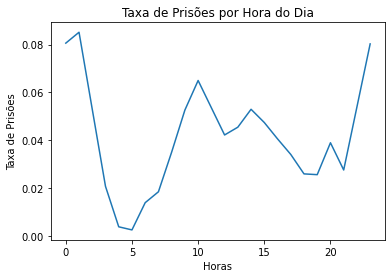

In [32]:
# Criando Ggráfico de Linhas.
hourly_arrest_rate.plot.line(title = 'Taxa de Prisões por Hora do Dia', xlabel = 'Horas', ylabel = 'Taxa de Prisões')

<AxesSubplot:xlabel='Anos', ylabel='Drogas Encontradas em Paradas'>

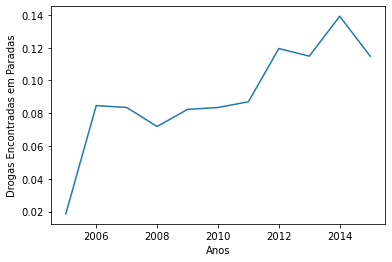

In [33]:
# Calculando a Taxa Anual de Apreensões De Drogas
Annual_drug_rate = Policia.groupby(Policia['stop_datetime'].dt.year)['drugs_related_stop'].sum()
soma = Annual_drug_rate.sum()
Annual_drug_rate/=soma

# Criando Ggráfico de Linhas.
Annual_drug_rate.plot.line(xlabel = 'Anos', ylabel = 'Drogas Encontradas em Paradas')

In [34]:
# Calculando a Taxa Anual de Buscas
Annual_search_rate = Policia.groupby(Policia['stop_datetime'].dt.year)['search_conducted'].sum()
soma = Annual_search_rate.sum()
Annual_search_rate/=soma

In [35]:
# Criando um Data Frame Para Expor Estas Taxas
anual = pd.concat([Annual_drug_rate,Annual_search_rate], axis = 1)
anual.columns = ['PARADAS COM ENVOLVIMENTO DE DROGAS', 'BUSCAS REALIZADAS']
anual.index.name = 'ANOS'
anual

,PARADAS COM ENVOLVIMENTO DE DROGAS,BUSCAS REALIZADAS
ANOS,,
2005,0.019,0.037
2006,0.085,0.127
2007,0.084,0.120
2008,0.072,0.101
2009,0.082,0.108
2010,0.084,0.097
2011,0.087,0.083
2012,0.119,0.106
2013,0.115,0.069


<AxesSubplot:xlabel='Anos', ylabel='Numero absoluto de buscas e de encontro de drogas'>

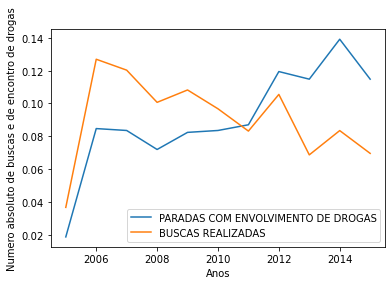

In [36]:
# Criando Ggráfico de Linhas
anual.plot.line(xlabel = 'Anos', ylabel = 'Numero absoluto de buscas e de encontro de drogas')

In [37]:
# Contando Quantas Violações Ocorreram em cada Distrito
Policia.groupby(['district','violation'])['driver_gender'].count()

district  violation          
Zone K1   Equipment                672
          Moving violation        1254
          Other                    290
          Registration/plates      120
          Speeding                5960
Zone K2   Equipment               2061
          Moving violation        2962
          Other                    942
          Registration/plates      768
          Seat belt                481
          Speeding               10448
Zone K3   Equipment               2302
          Moving violation        2898
          Other                    705
          Registration/plates      695
          Seat belt                638
          Speeding               12322
Zone X1   Equipment                296
          Moving violation         671
          Other                    143
          Registration/plates       38
          Seat belt                 74
          Speeding                1119
Zone X3   Equipment               2049
          Moving violation        

In [38]:
# Criando um DataFrame Para Representar as Violações em Cada Distrito 
dic = {'CAUSA' : ['Speeding', 'Moving violation', 'Equipment', 'Registration/plates', 'Seat belt', 'Other', 'Total'], 
       'Zone K1': [5960/8296, 1254/8296, 672/8296, 120/8296, 0/8296, 290/8296, 8296/8296], 
       'Zone K2' : [10448/17644, 2962/17644, 2061/17644, 768/17644, 481/17644, 924/17644, 17644/17644], 
      'Zone K3' : [12322/18922, 2898/18922, 2302/18922, 695/18922, 638/18922, 705/18922, 18922/18922], 
      'Zone X1' : [1119/2341, 671/2341, 296/2341, 38/2341, 74/2341, 143/2341, 2341/2341], 
      'Zone X3' : [8779/16174, 3086/16174, 2049/16174, 671/16174, 820/16174, 769/16174, 16174/16174], 
      'Zone X4' : [9795/22503, 5353/22503, 3541/22503, 1411/22503, 843/22503, 1560/22503, 22503/22503]}
Distritos = pd.DataFrame(dic)
Distritos

,CAUSA,Zone K1,Zone K2,Zone K3,Zone X1,Zone X3,Zone X4
0,Speeding,0.718,0.592,0.651,0.478,0.543,0.435
1,Moving violation,0.151,0.168,0.153,0.287,0.191,0.238
2,Equipment,0.081,0.117,0.122,0.126,0.127,0.157
3,Registration/plates,0.014,0.044,0.037,0.016,0.041,0.063
4,Seat belt,0.000,0.027,0.034,0.032,0.051,0.037
5,Other,0.035,0.052,0.037,0.061,0.048,0.069
6,Total,1.000,1.000,1.000,1.000,1.000,1.000


<AxesSubplot:xlabel='Causas: 6 - Total / 5 - Other / 4 - Seat Belt / 3 - Registrantion/Plates / 2 - Equipment / 1 - Moving Violation / 0 - Speeding ', ylabel='Infrações'>

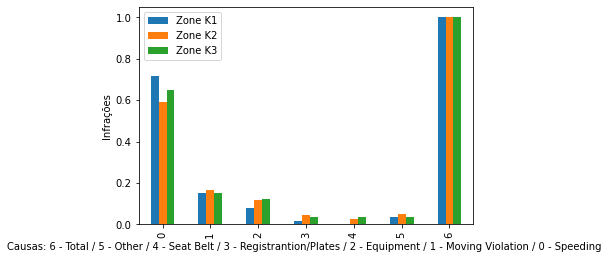

In [39]:
# Criando um Gráfico de Barras Agrupadas
Distritos[['Zone K1', 'Zone K2', 'Zone K3']]. plot.bar(ylabel = 'Infrações', 
                                                xlabel = 'Causas: 6 - Total / 5 - Other / 4 - Seat Belt / 3 - Registrantion/Plates / 2 - Equipment / 1 - Moving Violation / 0 - Speeding ')

## 4. Analisando o efeito do clima no policiamento.

_Nesta última parte, você usará um segundo conjunto de dados, weather.csv, para explorar
o impacto das condições meteorológicas no comportamento da polícia durante as paradas de
trânsito. Você vai praticar mesclar e remodelar conjuntos de dados, avaliando se uma fonte de
dados é confiável, trabalhando com dados categóricos e outras habilidades avançadas._

---

In [40]:
weather

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,USW00014765,2015-12-27,51.0,44,61,9.17,28.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4013,USW00014765,2015-12-28,40.0,30,44,12.30,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,USW00014765,2015-12-29,33.0,28,40,12.53,18.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4015,USW00014765,2015-12-30,30.0,27,35,6.93,15.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Descrevendo As Variáveis
a = weather[['TMIN', 'TAVG', 'TMAX']]
a.describe()

,TMIN,TAVG,TMAX
count,4017.000,1217.000,4017.000
mean,43.484,52.493,61.269
std,17.020,17.831,18.200
min,-5.000,6.000,15.000
25%,30.000,39.000,47.000
50%,44.000,54.000,62.000
75%,58.000,68.000,77.000
max,77.000,86.000,102.000


__Podemos afirmar que é uma região com oscilação média de 6 ºC até 16 ºC, e que é um conjunto de dados aparentemente confiável, pois os seus quartis provam que a média é representativa do conjunto de dados.__

----

<AxesSubplot:>

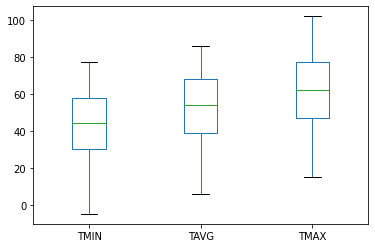

In [42]:
# Criando Boxplot das Variáveis de Temperatura
a.plot.box()